In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix as cm,f1_score # for evaluation
import itertools

style.use('ggplot')
np.random.seed(42) 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

%matplotlib inline
# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [2]:
dataset=pd.read_csv('../input/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df=dataset.drop(columns=['Time','Amount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
V1       284807 non-null float64
V2       284807 non-null float64
V3       284807 non-null float64
V4       284807 non-null float64
V5       284807 non-null float64
V6       284807 non-null float64
V7       284807 non-null float64
V8       284807 non-null float64
V9       284807 non-null float64
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V13      284807 non-null float64
V14      284807 non-null float64
V15      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V19      284807 non-null float64
V20      284807 non-null float64
V21      284807 non-null float64
V22      284807 non-null float64
V23      284807 non-null float64
V24      284807 non-null float64
V25      284807 non-null float64
V26      284807 non-null float64
V27      284807 non-null float6

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


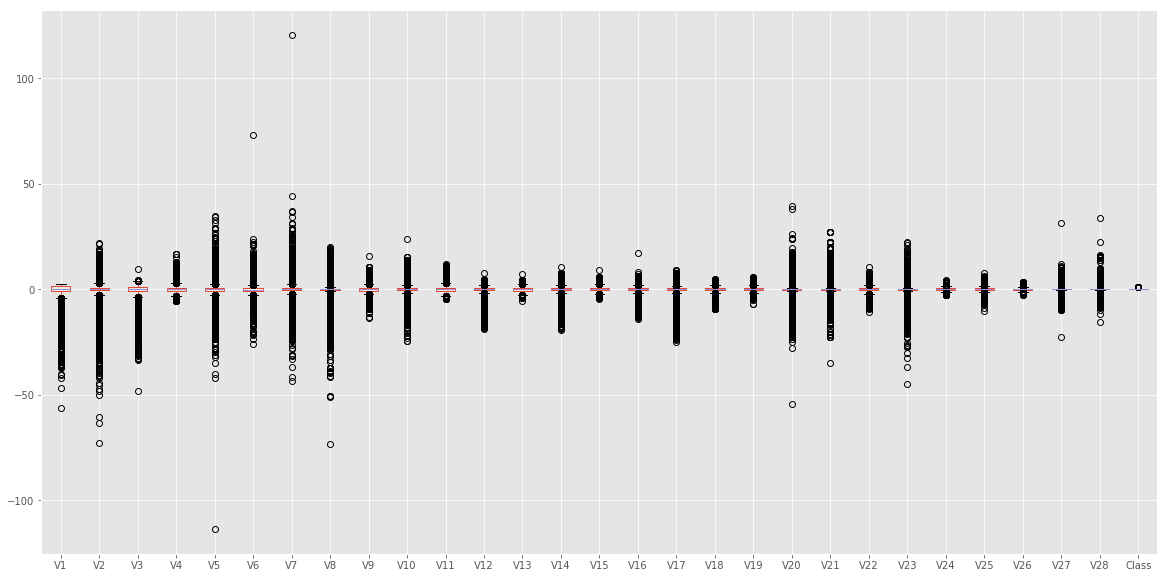

In [6]:
df.plot(kind='box',figsize=(20,10))

### split

In [7]:
df_good=df[df['Class']==0]
df_bad=df[df['Class']==1]
print(df_good.shape)
print(df_bad.shape)

(284315, 29)
(492, 29)


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
df_train1,df_validate1=train_test_split(df_good,test_size=.02)

In [10]:
df_train=df_train1.iloc[:,0:28]

In [11]:
df_val1,df_test1=train_test_split(df_validate1,test_size=.5)

In [12]:
df_val2,df_test2=train_test_split(df_bad,test_size=.5)

In [13]:
df_val3=df_val1.append(df_val2).sample(frac=1)
df_test3=df_test1.append(df_test2).sample(frac=1)

In [14]:
y_val=df_val3['Class']
y_test=df_test3['Class']
df_val=df_val3.iloc[:,0:28]
df_test=df_test3.iloc[:,0:28]
print(df_val.shape)
print(y_val.shape)
print(df_test.shape)
print(y_test.shape)
print(df_train.shape)

(3089, 28)
(3089,)
(3090, 28)
(3090,)
(278628, 28)


### Feature Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
scaler.fit(df_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train=scaler.transform(df_train)

In [19]:
X_val=scaler.transform(df_val)

In [20]:
X_test=scaler.transform(df_test)

In [21]:
X_train[1].shape

(28,)

### autoencoder

In [22]:
inputshape=X_train[1].shape

In [23]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model,Sequential,load_model
from keras.losses import categorical_crossentropy,binary_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,TensorBoard


Using TensorFlow backend.


In [24]:
bsize=64
num_train_sample=len(X_train)
print(num_train_sample)

278628


In [25]:
input1=Input(shape=inputshape)

In [26]:
encoder1=Dense(32,activation='relu')(input1)
encoder2=Dense(16,activation='relu')(encoder1)
encoder3=Dense(4,activation='relu')(encoder2)

In [27]:
decoder1=Dense(16,activation='relu')(encoder3)
decoder2=Dense(32,activation='relu')(decoder1)
decoder3=Dense(28,activation='sigmoid')(decoder2)

In [28]:
autoencoder=Model(inputs=input1,outputs=decoder3)

In [29]:
encoder=Model(input1,encoder3)

In [30]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [31]:
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

In [32]:
history = autoencoder.fit(X_train, X_train,
                    epochs=10,
                    batch_size=bsize,
                    shuffle=True,
                    validation_data=(X_val, X_val),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 278628 samples, validate on 3089 samples
Epoch 1/10
278628/278628 [==============================] - 5s 16us/step - loss: 0.0024 - acc: 0.9693 - val_loss: 0.0033 - val_acc: 0.9764
Epoch 2/10
278628/278628 [==============================] - 5s 16us/step - loss: 0.0015 - acc: 0.9908 - val_loss: 0.0032 - val_acc: 0.9744
Epoch 3/10
278628/278628 [==============================] - 5s 17us/step - loss: 0.0014 - acc: 0.9909 - val_loss: 0.0032 - val_acc: 0.9663
Epoch 4/10
278628/278628 [==============================] - 5s 17us/step - loss: 0.0014 - acc: 0.9909 - val_loss: 0.0032 - val_acc: 0.9676
Epoch 5/10
278628/278628 [==============================] - 5s 17us/step - loss: 0.0014 - acc: 0.9909 - val_loss: 0.0032 - val_acc: 0.9718
Epoch 6/10
278628/278628 [==============================] - 5s 16us/step - loss: 0.0013 - acc: 0.9908 - val_loss: 0.0033 - val_acc: 0.9764
Epoch 7/10
278628/278628 [==============================] - 5s 17us/step - loss: 0.0013 - acc: 0.9908 - val_loss: 0.

In [33]:

autoencoder  = load_model('model.h5')

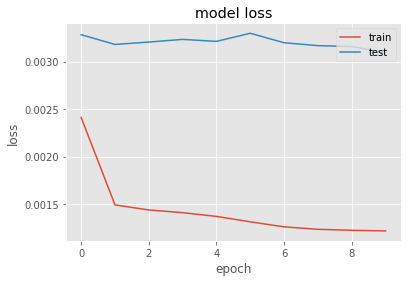

In [34]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [35]:
predictions = autoencoder.predict(X_val)

In [36]:
mse = np.mean(np.power(X_val - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse*1000,
                        'true_class': y_val})

In [37]:
error_df.describe()

,reconstruction_error,true_class
count,3089.000000,3089.000000
mean,3.092844,0.079637
std,9.688239,0.270775
min,0.133283,0.000000
25%,0.640261,0.000000
50%,0.971763,0.000000
75%,1.671593,0.000000
max,97.053632,1.000000


In [38]:
tresholds = np.linspace(0, 100, 200)
scores = []
for treshold in tresholds:
    y_hat = error_df.reconstruction_error > treshold
    scores.append([recall_score(y_true=y_val,y_pred=y_hat),
                 precision_score(y_true=y_val,y_pred=y_hat),
                 f1_score(y_true=y_val,y_pred=y_hat)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.858387799564 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
final_tresh = tresholds[scores[:, 2].argmax()]
final_tresh

6.0301507537688437

In [40]:
predictions = autoencoder.predict(X_test)

In [41]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse*1000,
                        'true_class': y_test})

In [42]:
error_df.true_class.sum()

246

In [43]:
error_df['outlaiyer']=error_df.reconstruction_error>final_tresh

In [44]:
error_df.outlaiyer.sum()

224

In [45]:
cm(error_df.true_class,error_df.outlaiyer)

array([[2828,   16],
       [  38,  208]], dtype=int64)

In [46]:
f1_score(error_df.true_class,error_df.outlaiyer)

0.88510638297872357